In [507]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import string

In [508]:
books = pd.read_csv("Books.csv",dtype = {"Book-Author":'string'})
books.isna().sum()
print(books.columns)
books = books.rename(columns = {'Book-Title':'title','Book-Author':'author','Publisher':'publisher'})
books.info()

C:\Users\rohan\AppData\Local\Temp\ipykernel_17464\422189320.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv",dtype = {"Book-Author":'string'})


Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   title                271360 non-null  object
 2   author               271358 non-null  string
 3   Year-Of-Publication  271360 non-null  object
 4   publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(7), string(1)
memory usage: 16.6+ MB


In [509]:
books['publisher'].value_counts().head(20)
# Single publisher has published many books
print(books['publisher'].unique().shape)
# 16808 unique Publishers

(16808,)


In [510]:
book_title_20 = books['title'].value_counts().head(20)
print(book_title_20)
books.loc[books['title'] == 'Dracula']
# there are many books with same names published by different publisher in different years

title
Selected Poems                    27
Little Women                      24
Wuthering Heights                 21
The Secret Garden                 20
Dracula                           20
Adventures of Huckleberry Finn    20
Jane Eyre                         19
The Night Before Christmas        18
Pride and Prejudice               18
Great Expectations                17
Masquerade                        16
Black Beauty                      16
Frankenstein                      16
The Gift                          15
Emma                              15
Beloved                           15
Nemesis                           14
Illusions                         13
Psychology                        13
Journey                           13
Name: count, dtype: int64


,ISBN,title,author,Year-Of-Publication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
2959,156619301X,Dracula,Bram Stoker,1994,Dorset Press,http://images.amazon.com/images/P/156619301X.0...,http://images.amazon.com/images/P/156619301X.0...,http://images.amazon.com/images/P/156619301X.0...
5332,055321148X,Dracula,Bram Stoker,1983,Bantam,http://images.amazon.com/images/P/055321148X.0...,http://images.amazon.com/images/P/055321148X.0...,http://images.amazon.com/images/P/055321148X.0...
12753,9875021245,Dracula,Bram Stoker,2004,Distal,http://images.amazon.com/images/P/9875021245.0...,http://images.amazon.com/images/P/9875021245.0...,http://images.amazon.com/images/P/9875021245.0...
12988,0140052801,Dracula,Bram Stoker,1992,Penguin USA,http://images.amazon.com/images/P/0140052801.0...,http://images.amazon.com/images/P/0140052801.0...,http://images.amazon.com/images/P/0140052801.0...
52115,0451175816,Dracula,Bram Stoker,1992,New Amer Library Classics,http://images.amazon.com/images/P/0451175816.0...,http://images.amazon.com/images/P/0451175816.0...,http://images.amazon.com/images/P/0451175816.0...
61616,0880299010,Dracula,Bram Stoker,1992,Barnes Noble Books,http://images.amazon.com/images/P/0880299010.0...,http://images.amazon.com/images/P/0880299010.0...,http://images.amazon.com/images/P/0880299010.0...
68981,8481301183,Dracula,Bram Stocker,2001,Colleccion Millenium,http://images.amazon.com/images/P/8481301183.0...,http://images.amazon.com/images/P/8481301183.0...,http://images.amazon.com/images/P/8481301183.0...
72472,1562542621,Dracula,Emily Hutchinson,1998,"Saddleback Publishing, Inc.",http://images.amazon.com/images/P/1562542621.0...,http://images.amazon.com/images/P/1562542621.0...,http://images.amazon.com/images/P/1562542621.0...
82829,0515053473,Dracula,Bram Stoker,1979,Berkley Pub Group (Mm),http://images.amazon.com/images/P/0515053473.0...,http://images.amazon.com/images/P/0515053473.0...,http://images.amazon.com/images/P/0515053473.0...
92499,0863221432,Dracula,Bram Stoker,1992,Brandon/Mount Eagle,http://images.amazon.com/images/P/0863221432.0...,http://images.amazon.com/images/P/0863221432.0...,http://images.amazon.com/images/P/0863221432.0...


In [511]:
NumberOfBooks = []
Year = []
for i in range (1970,2020):
    print(f" for year {i} no. of books published and present in this DataSet are {books.loc[books['Year-Of-Publication'] == i].shape[0]}")
    NumberOfBooks.append(books.loc[books['Year-Of-Publication'] == i].shape[0])
    Year.append(i)


 for year 1970 no. of books published and present in this DataSet are 307
 for year 1971 no. of books published and present in this DataSet are 352
 for year 1972 no. of books published and present in this DataSet are 541
 for year 1973 no. of books published and present in this DataSet are 641
 for year 1974 no. of books published and present in this DataSet are 714
 for year 1975 no. of books published and present in this DataSet are 855
 for year 1976 no. of books published and present in this DataSet are 1117
 for year 1977 no. of books published and present in this DataSet are 1362
 for year 1978 no. of books published and present in this DataSet are 1520
 for year 1979 no. of books published and present in this DataSet are 1539
 for year 1980 no. of books published and present in this DataSet are 1928
 for year 1981 no. of books published and present in this DataSet are 2359
 for year 1982 no. of books published and present in this DataSet are 3132
 for year 1983 no. of books pub

Text(0, 0.5, 'Number Of Books in DataSet For each Year ')

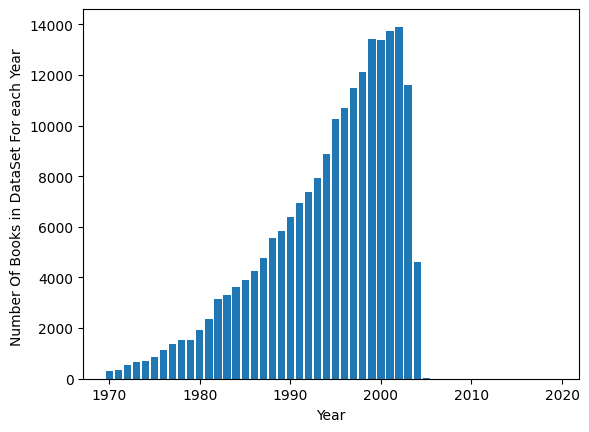

In [512]:
plt.bar(Year ,NumberOfBooks)
plt.xlabel("Year")
plt.ylabel("Number Of Books in DataSet For each Year ")

In [513]:
ratings = pd.read_csv("Ratings.csv")
ratings.isna()

,User-ID,ISBN,Book-Rating
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1149775,False,False,False
1149776,False,False,False
1149777,False,False,False
1149778,False,False,False


In [514]:
ratings.head(3)
ratings.loc[1,'User-ID']

276726

In [515]:
ratings.shape, users.shape, books.shape

((1149780, 3), (278858, 3), (271360, 8))

In [516]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [517]:
users.columns, ratings.columns , books.columns

(Index(['User-ID', 'Location', 'Age'], dtype='object'),
 Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object'),
 Index(['ISBN', 'title', 'author', 'Year-Of-Publication', 'publisher',
        'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
       dtype='object'))

## Popularity Based Recommender System

In [518]:
#merging ratings and books DataFrame on ISBN
ratings_with_name = ratings.merge(books,on='ISBN')

In [519]:
ratings_with_name

,User-ID,ISBN,Book-Rating,title,author,Year-Of-Publication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1031132,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1031133,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1031134,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [707]:
num_rating_df = ratings_with_name.groupby('title').count().reset_index()[['title','Book-Rating']]
num_rating_df

,title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [708]:
avg_rating_df = ratings_with_name.groupby('title')['Book-Rating'].mean().reset_index()[['title','Book-Rating']]
avg_rating_df.rename(columns = {'Book-Rating': 'AvgRating'},inplace = True)
avg_rating_df

,title,AvgRating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [709]:
popularity_df = num_rating_df.merge(avg_rating_df, on = 'title')
popularity_df.rename(columns = {'Book-Rating':'NumRating'},inplace = True)
popularity_df.drop_duplicates(inplace = True)

In [710]:
mask = popularity_df['NumRating'] > 250
popularity_df = popularity_df[mask]
popularity_df = popularity_df.sort_values('AvgRating',ascending=False).head(50)

In [711]:
Popularity = popularity_df.merge(books,on='title')
Popularity = Popularity.drop_duplicates('title')
Popularity.shape[0]

50

In [712]:
Popularity = Popularity[['title','NumRating','AvgRating','author','Image-URL-M']]
Popularity

,title,NumRating,AvgRating,author,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...
16,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...
17,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...
26,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...
28,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...
39,To Kill a Mockingbird,510,4.700000,Harper Lee,http://images.amazon.com/images/P/0446310786.0...


## Colaborative Filtering

<font color = 'Blue'>Only Considering those Books Which are rated by more that 50 People and only those People who have rated atleast 200 movies</font>

In [713]:
ratings_with_name

,User-ID,ISBN,Book-Rating,title,author,Year-Of-Publication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1031132,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1031133,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1031134,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [714]:
x = ratings_with_name.groupby("User-ID").count()['Book-Rating'] > 200
book_padhne_Waale = x[x].index

In [715]:
good_users = ratings_with_name[ratings_with_name['User-ID'].isin(book_padhne_Waale)]

In [716]:
y = good_users.groupby("title").count()['Book-Rating'] > 50
book_index = y[y].index 

In [717]:
df = good_users[good_users['title'].isin(book_index)]

In [718]:
df

,User-ID,ISBN,Book-Rating,title,author,Year-Of-Publication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1163,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1165,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1174,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
1029196,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...
1029197,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...
1029270,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...
1029309,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...


In [719]:
pivot_table = df.pivot_table(index = 'title',columns ='User-ID',values='Book-Rating' )
pivot_table.fillna(0,inplace = True)
pivot_table_mean = pivot_table.mean()
pivot_table.fillna(pivot_table_mean,inplace = True)

In [720]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(pivot_table)

In [721]:
similarity.shape

(679, 679)

In [722]:
similarity

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [723]:
def Recommend(movie_name):
    # movie name se uska index 
    movie_index = np.where(pivot_table.index == movie_name)[0][0]
    similar_movie_index = sorted(list(enumerate(similarity[movie_index])),key = lambda x : x[1],reverse=True)[1:6]

    for i in similar_movie_index :
        print(pivot_table.index[i[0]])
        
    

    
    

In [724]:
Recommend('Zoya')

Fine Things
Secrets
Kaleidoscope
Exclusive
Five Days in Paris


Whenever Required i can convert this into a Website , Therefore Creating Necessary files to import 

In [725]:
import pickle
pickle.dump(Recommend,open('recommend.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))
pickle.dump(pivot_table,open('pivot_table.pkl','wb'))

Index(['ISBN', 'title', 'author', 'Year-Of-Publication', 'publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')